In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot')
sns.set_palette("deep")

In [3]:
from functions.load_data import *

# Load Data

In [5]:
df = load_diabetes_data()
display(df.head())
print(df.shape)

C:\Users\utgoy\Desktop\Topics_Project\code\functions\load_data.py:79: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'MISSING' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  diabetes.fillna("MISSING", inplace = True)


,house_family_person_id,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,class_of_worker,years_on_job,...,cancer,family_history_diabetes,ever_worked,more_than_one_job,kidney_condition,liver_condition,cant_afford_meds,skipped_meds,non_hispanic_race,hispanic
0,1_2_1,0,24,0,2,0,125,0,1.0,2.0,...,0,0,MISSING,2.0,0,0,2,MISSING,2,12
1,2_1_1,0,76,0,1,0,190,0,3.0,25.0,...,0,0,1.0,MISSING,0,0,2,MISSING,1,12
2,3_1_2,0,36,0,2,0,225,0,1.0,2.0,...,0,1,MISSING,2.0,0,0,1,2.0,1,3
3,5_1_1,0,35,1,2,0,240,0,1.0,1.0,...,0,1,MISSING,2.0,0,0,1,1.0,1,3
4,10_1_5,0,20,0,2,0,103,0,MISSING,MISSING,...,0,1,2.0,MISSING,0,0,2,MISSING,1,1


(32499, 23)


# Understanding Data

In [7]:
df.describe().round(2)

,diabetes,age,smoker,sex,coronary_heart_disease,weight,had_high_cholesterol,height,hypertension,heart_condition,cancer,family_history_diabetes,kidney_condition,liver_condition,cant_afford_meds,non_hispanic_race,hispanic
count,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00,32499.00
mean,0.11,51.05,0.41,1.55,0.06,251.11,0.22,68.82,0.36,0.09,0.11,0.35,0.02,0.02,1.99,1.82,10.98
std,0.31,18.51,0.49,0.50,0.23,240.28,0.42,8.46,0.48,0.29,0.32,0.48,0.15,0.14,0.62,2.79,2.90
min,0.00,18.00,0.00,1.00,0.00,100.00,0.00,59.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,0.00
25%,0.00,35.00,0.00,1.00,0.00,150.00,0.00,64.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,12.00
50%,0.00,52.00,0.00,2.00,0.00,176.00,0.00,67.00,0.00,0.00,0.00,0.00,0.00,0.00,2.00,1.00,12.00
75%,0.00,66.00,1.00,2.00,0.00,214.00,0.00,70.00,1.00,0.00,0.00,1.00,0.00,0.00,2.00,1.00,12.00
max,1.00,85.00,1.00,2.00,1.00,999.00,1.00,99.00,1.00,1.00,1.00,1.00,1.00,1.00,9.00,17.00,12.00


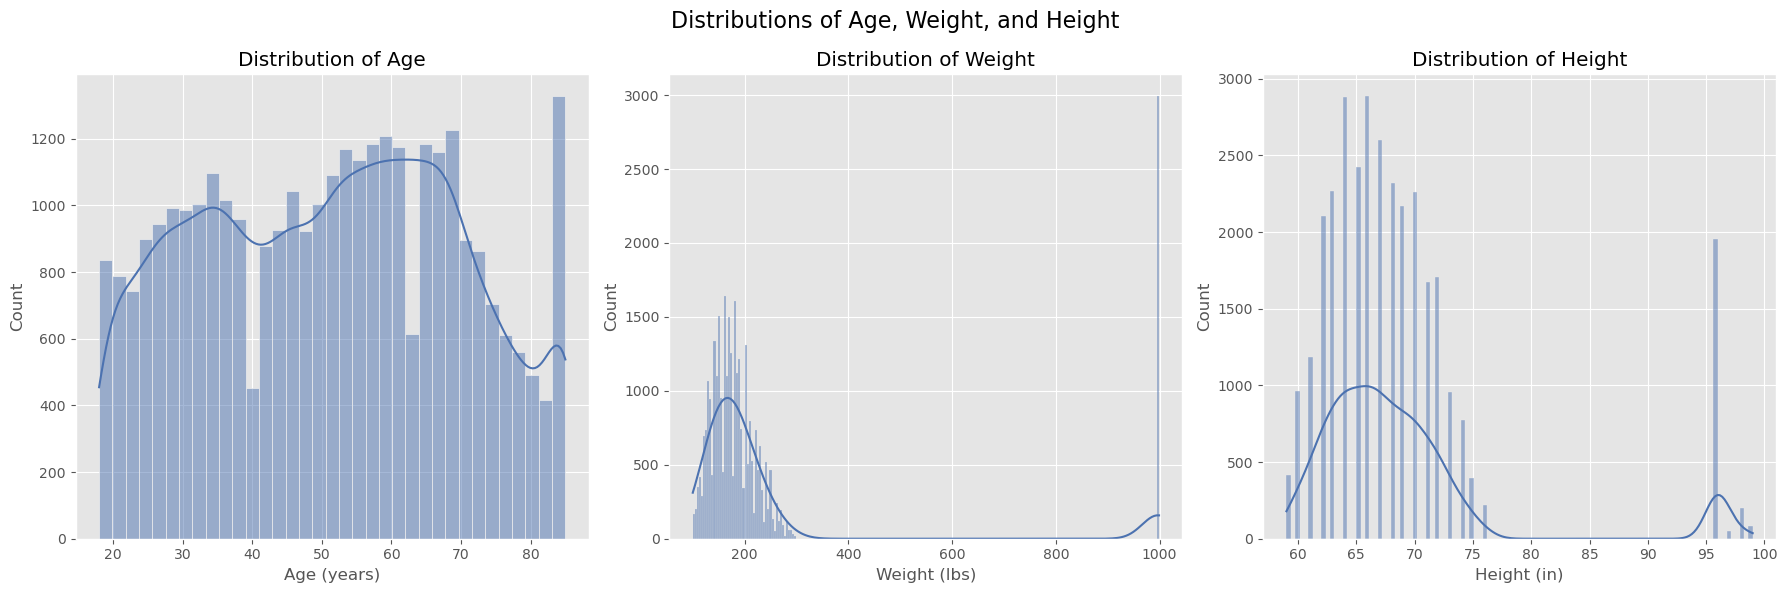

In [8]:
# Create a figure with 3 subplots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('Distributions of Age, Weight, and Height', fontsize=16)

# Histogram for Age
sns.histplot(data=df, x='age', kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df, x='weight', kde=True, ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df, x='height', kde=True, ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

plt.tight_layout()
plt.show()

#not much clarity for 85+
#for weight at or above 300 lbs, fill with NA (not expected from file layout reference)
#for height at or above 77 in, fll with NA (not expected from file layout reference)

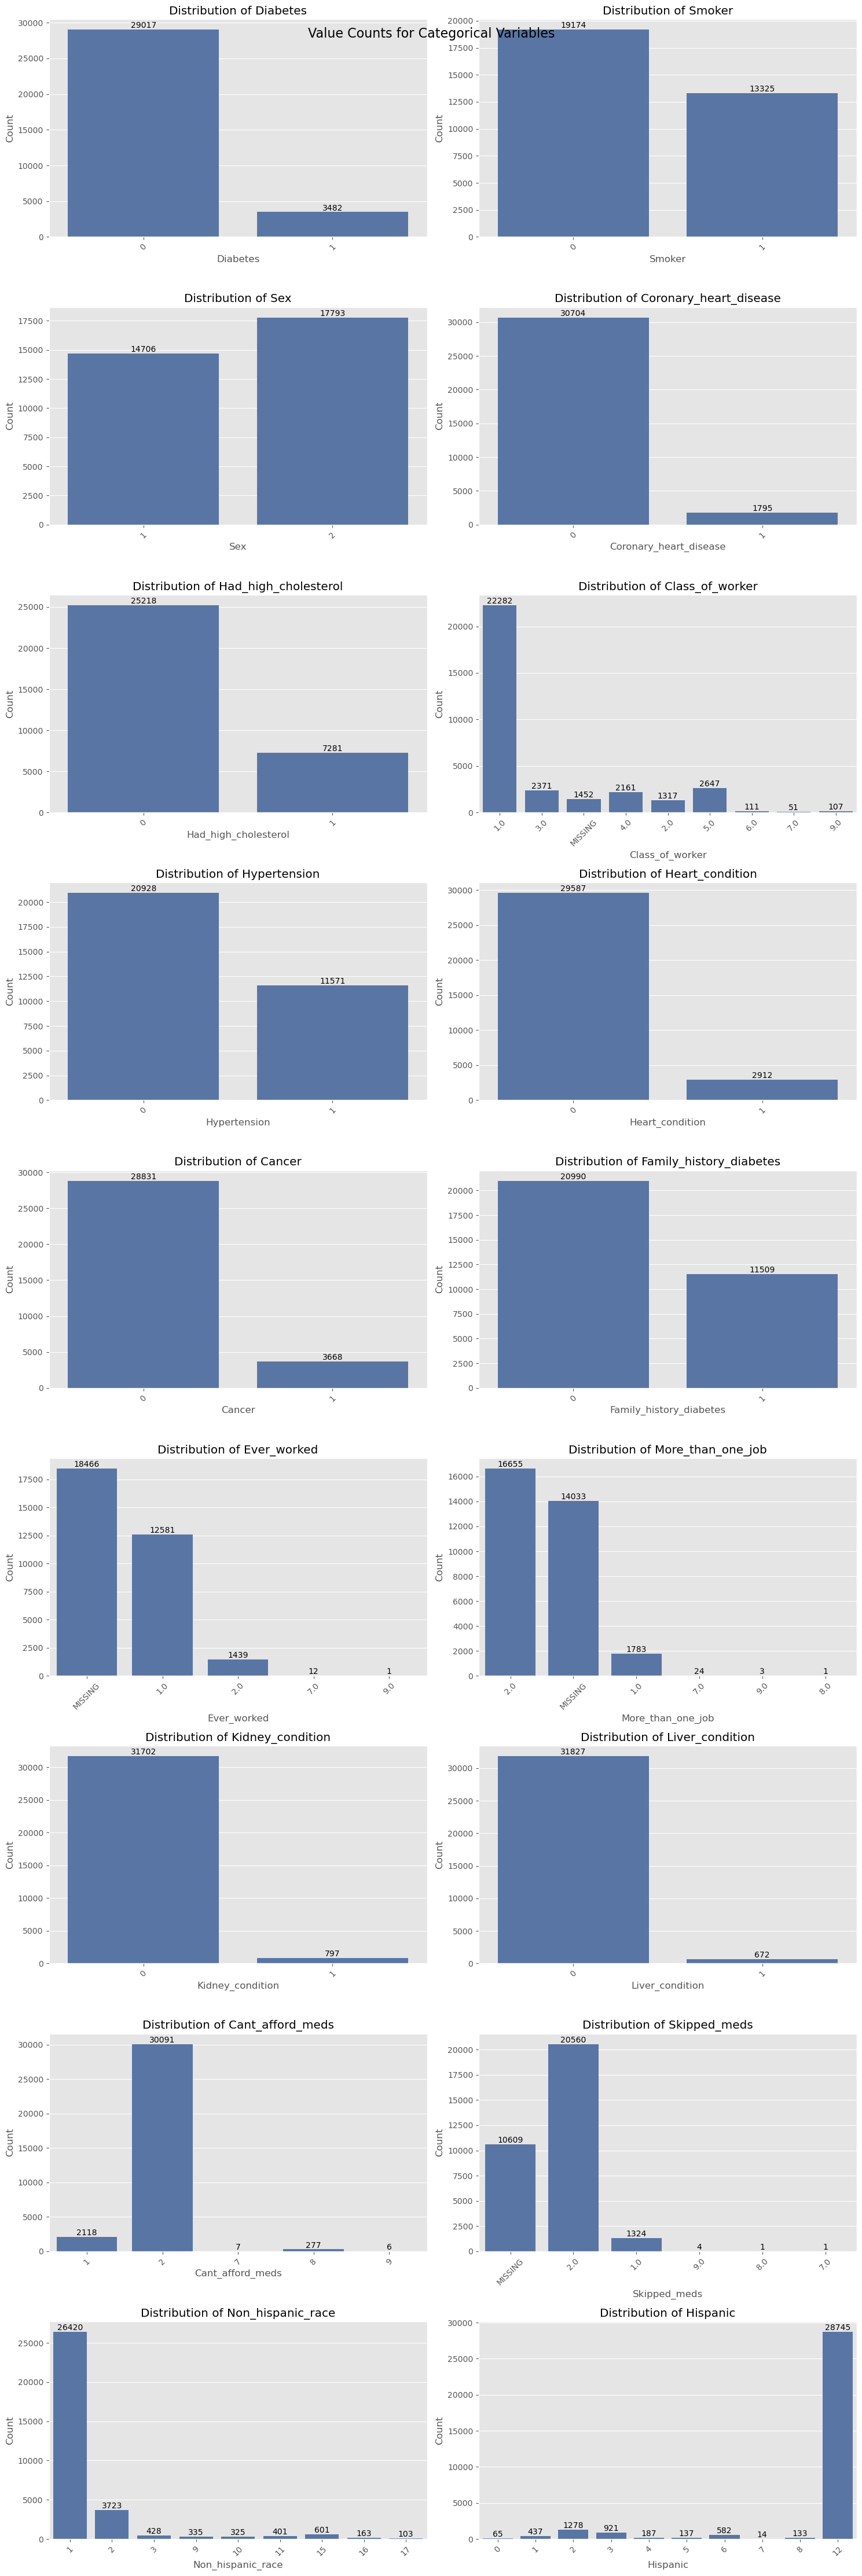

In [9]:
columns_to_plot = ["diabetes",
                   "smoker",
                   "sex",
                   "coronary_heart_disease",
                   "had_high_cholesterol",
                   "class_of_worker",
                   "hypertension",
                   "heart_condition",
                   "cancer",
                   "family_history_diabetes",
                   "ever_worked",
                   "more_than_one_job",
                   "kidney_condition",
                   "liver_condition",
                   "cant_afford_meds",
                   "skipped_meds",
                   "non_hispanic_race",
                   "hispanic"]

# Create subplots based on the number of columns to plot
n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

#refused, ascertain, and don't know can be pooled as 'other'

# Feature Engineering

In [87]:
df_clean = df.copy()

#Grouping small columns together
columns_to_merge = {
    'smoker': [7, 8, 9],
    'class_of_worker': [7, 8, 9],
    'more_than_one_job': [7, 8, 9],
    'kidney_condition': [7, 8, 9],
    'liver_condition': [7, 8, 9],
    'cant_afford_meds': [7, 8, 9],
    'skipped_meds': [7, 8, 9],
    'ever_worked': [7, 8, 9],
}

for column, values in columns_to_merge.items():
    df_clean[column] = df_clean[column].replace(values, 'OTHER')

#creating meaninful names for the column vales

mapping_dict = {
    
"diabetes":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"smoker":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"coronary_heart_disease":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"had_high_cholesterol":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"hypertension":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"heart_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"cancer":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"family_history_diabetes":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"kidney_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"liver_condition":{1:'YES', 0:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},   

"sex":{1:'MALE', 2:'FEMALE','OTHER':'OTHER', 'MISSING':'MISSING'},    
"ever_worked":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"more_than_one_job":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"cant_afford_meds":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},
"skipped_meds":{1:'YES', 2:'NO','OTHER':'OTHER', 'MISSING':'MISSING'},

"non_hispanic_race":{1:'White',2: 'Black/African American',3:'Indian (American), Alaska Native',9: 'Asian Indian' , 
                     10: 'Chinese' ,11 :'Filipino' ,15 :'Other Asian',16 :'Primary race not releasable' ,
                     17 :'Multiple race, no primary race selected','OTHER':'OTHER', 'MISSING':'MISSING'},

"hispanic":{0: 'Multiple Hispanic',1 :'Puerto Rico',2: 'Mexican',3 :'Mexican-American',4 :'Cuban/Cuban American',
            5: 'Dominican (Republic)',6: 'Central or South American',7: 'Other Latin American, not specified',8: 'Other Spanish',
            9: 'Hispanic/Latino/Spanish, non-specific',10: 'Hispanic/Latino/Spanish, type refused',
            11: 'Hispanic/Latino/Spanish, type not ascertained', 12: 'Not Hispanic/Spanish origin',
            'OTHER':'OTHER', 'MISSING':'MISSING',},

'class_of_worker':{1:'PRIVATE COMPANY', 2:'FEDERAL GOVERNMENT', 3:'STATE GOVERNMENT',
                    4:'LOCAL GOVERNMENT', 5:'SELF-EMPLOYED', 6:'IN FAMLY-OWED WITHOUT PAY', 
                    7:'Refused',8:'Not ascertained',9:"Don't know",'OTHER':'OTHER', 'MISSING':'MISSING',},
}

In [89]:
for key, value in mapping_dict.items():
    df_clean[key] = df_clean[key].map(value)

In [91]:
# df_clean.groupby(['hispanic'])['non_hispanic_race'].unique().reset_index()
#every hispanic subgroup has a combintion of every race except for Asian Indian

In [93]:
age_bins = [18, 25, 35, 45, 55, 65, 75, 85]
age_labels = ['Young Adult (18-25)', 'Emerging Adulthood (26-35)', 
              'Early Middle Age (36-45)', 'Midlife (46-55)', 
              'Late Middle Age (56-65)', 'Early Senior (66-75)', 
              'Senior (76-85)']

# Apply life stage categorization
df_clean['age_group'] = pd.cut(df_clean['age'], bins=age_bins, labels=age_labels)

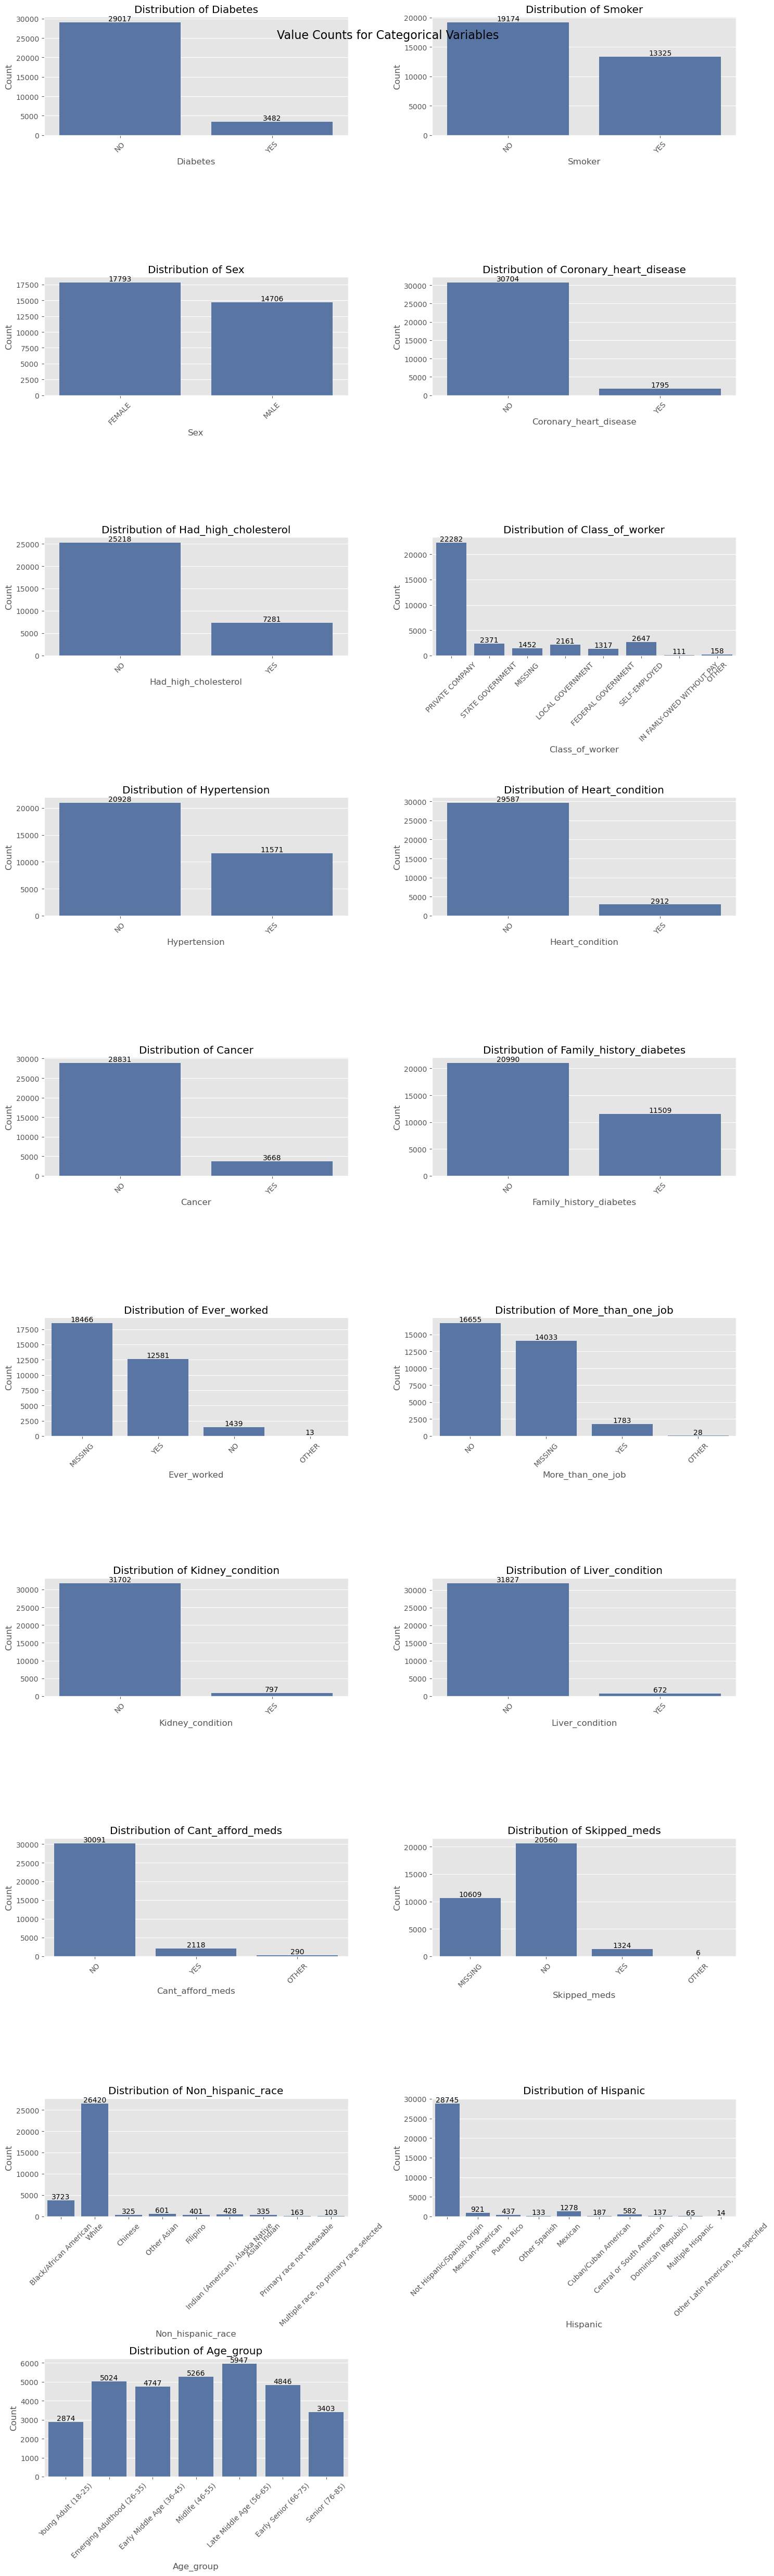

In [95]:
columns_to_plot = ["diabetes",
                   "smoker",
                   "sex",
                   "coronary_heart_disease",
                   "had_high_cholesterol",
                   "class_of_worker",
                   "hypertension",
                   "heart_condition",
                   "cancer",
                   "family_history_diabetes",
                   "ever_worked",
                   "more_than_one_job",
                   "kidney_condition",
                   "liver_condition",
                   "cant_afford_meds",
                   "skipped_meds",
                   "non_hispanic_race",
                   "hispanic",'age_group']

n_cols = 2
n_rows = (len(columns_to_plot) + 1) // 2  # Round up to the nearest integer
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
fig.suptitle('Value Counts for Categorical Variables', fontsize=16)

# Flatten the axes array for easier indexing
axes = axes.flatten()

# Create value count plots
for i, column in enumerate(columns_to_plot):
    sns.countplot(data=df_clean, x=column, ax=axes[i])
    axes[i].set_title(f'Distribution of {column.capitalize()}')
    axes[i].set_xlabel(column.capitalize())
    axes[i].set_ylabel('Count')
    
    # Rotate x-axis labels if they're too long
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add value labels on top of each bar
    for p in axes[i].patches:
        axes[i].annotate(f'{int(p.get_height())}', 
                         (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='center', 
                         xytext=(0, 5), textcoords='offset points')

# Remove any unused subplots
for i in range(len(columns_to_plot), len(axes)):
    fig.delaxes(axes[i])

# Adjust layout and display the plot
plt.tight_layout()
plt.show()

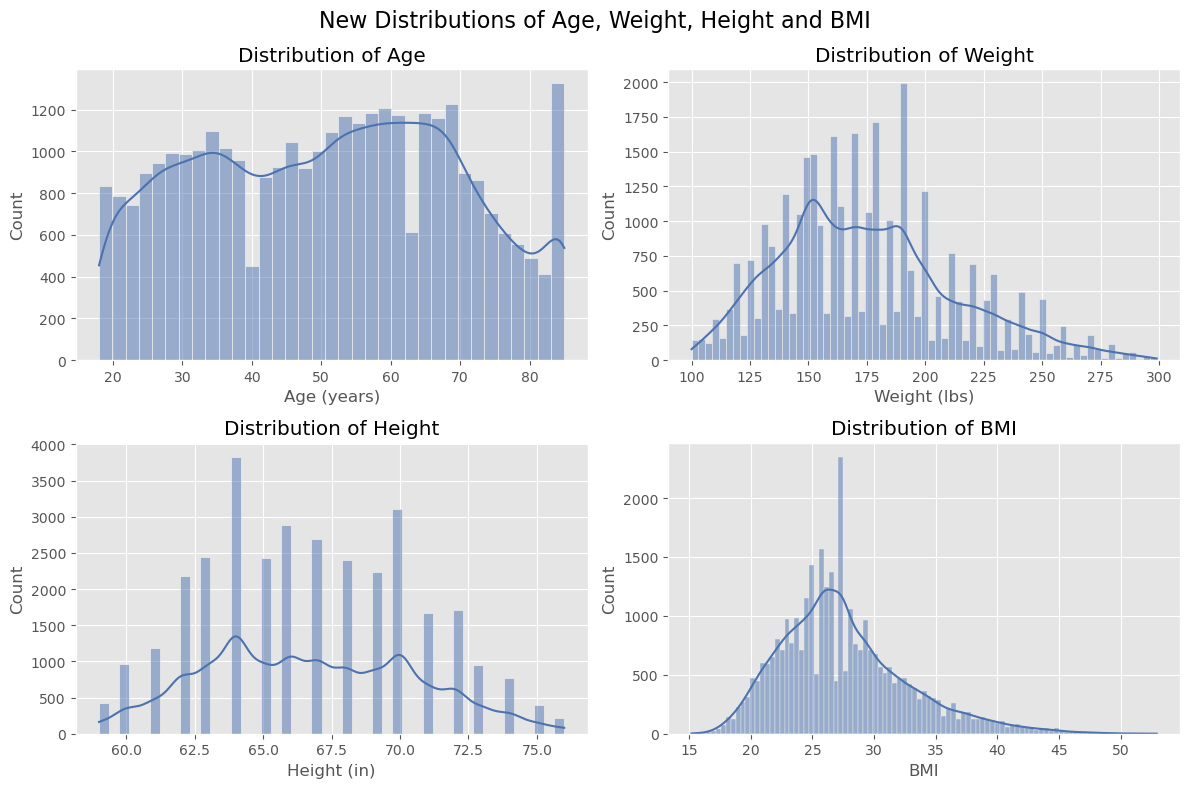

In [96]:
#Nan for weight and height
df_clean.loc[df_clean['weight'] >= 300, 'weight'] = np.nan
df_clean.loc[df_clean['height'] >= 77, 'height'] = np.nan

#imputing Nan values weight and height
#stratified median for imputation based on 'sex', 'non_hispanic_race', 'hispanic' for more accurate representation of skewed values
df_clean['weight'] = df_clean.groupby(['sex', 'non_hispanic_race', 'hispanic'])['weight'].transform(lambda x: x.fillna(x.median()))
df_clean['height'] = df_clean.groupby(['sex', 'non_hispanic_race', 'hispanic'])['height'].transform(lambda x: x.fillna(x.median()))

# New BMI
df_clean['bmi'] = df_clean['weight'] / (df_clean['height'] ** 2)*703
df_clean['bmi'] = df_clean['bmi'].round(2)

# Create a figure with 3 subplots
fig, [[ax1, ax2], [ax3, ax4]] = plt.subplots(2, 2, figsize=(12, 8))  # Unpacking 2D array
fig.suptitle('New Distributions of Age, Weight, Height and BMI', fontsize=16)

# Histogram for Age
sns.histplot(data=df_clean, x='age', kde=True, ax=ax1)
ax1.set_title('Distribution of Age')
ax1.set_xlabel('Age (years)')
ax1.set_ylabel('Count')

# Histogram for Weight
sns.histplot(data=df_clean, x='weight', kde=True, ax=ax2)
ax2.set_title('Distribution of Weight')
ax2.set_xlabel('Weight (lbs)')
ax2.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df_clean, x='height', kde=True, ax=ax3)
ax3.set_title('Distribution of Height')
ax3.set_xlabel('Height (in)')
ax3.set_ylabel('Count')

# Histogram for Height
sns.histplot(data=df_clean, x='bmi', kde=True, ax=ax4)
ax4.set_title('Distribution of BMI')
ax4.set_xlabel('BMI')
ax4.set_ylabel('Count')

plt.tight_layout()
plt.show()

# Visualizations 

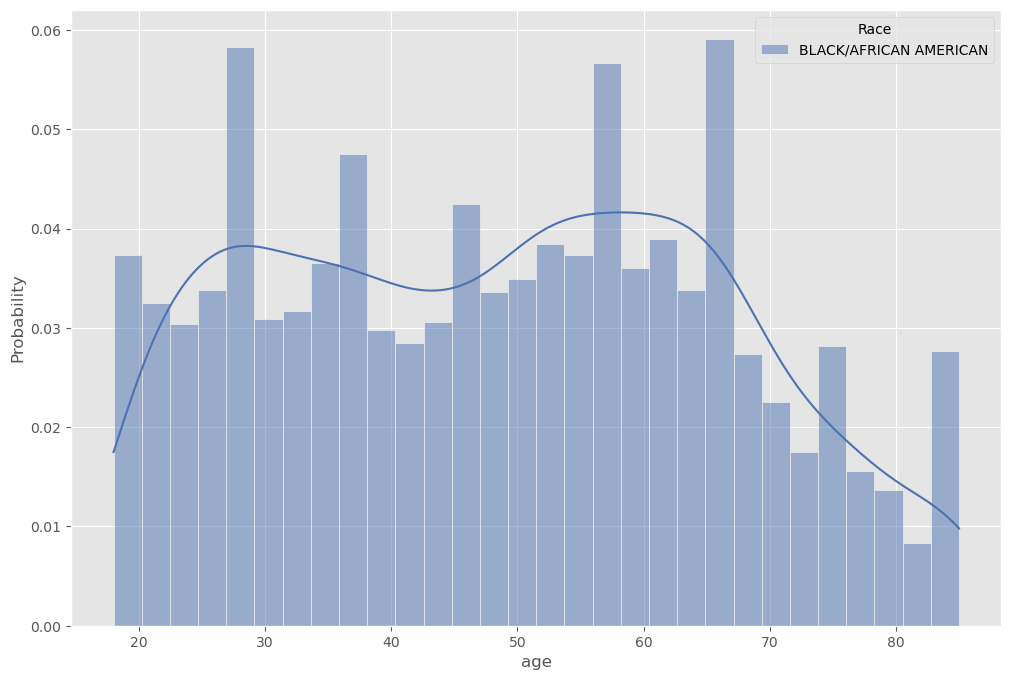

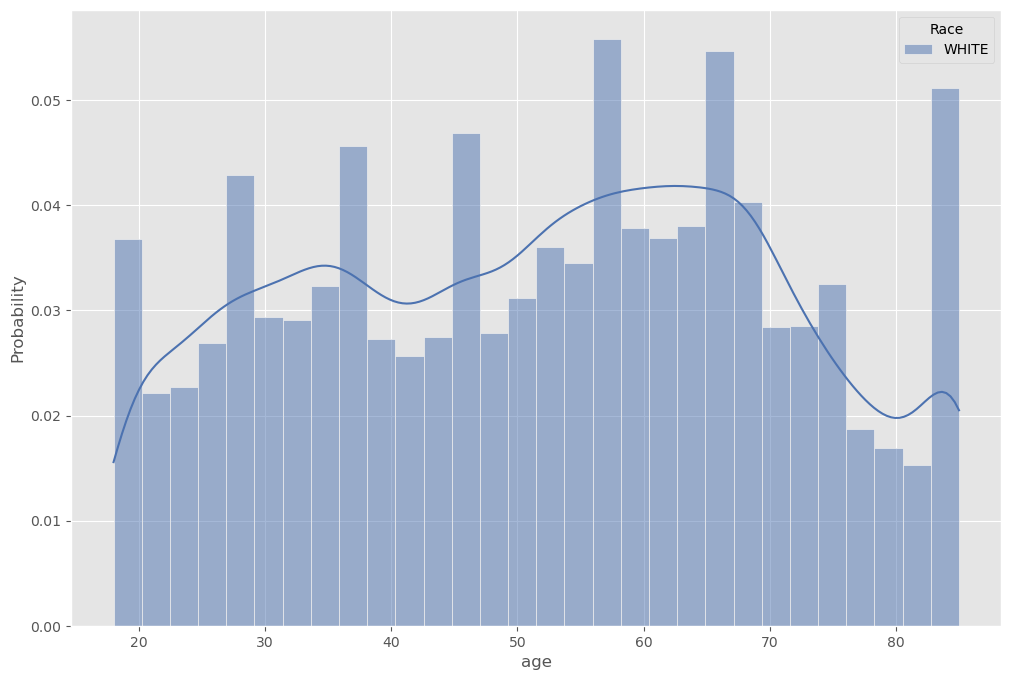

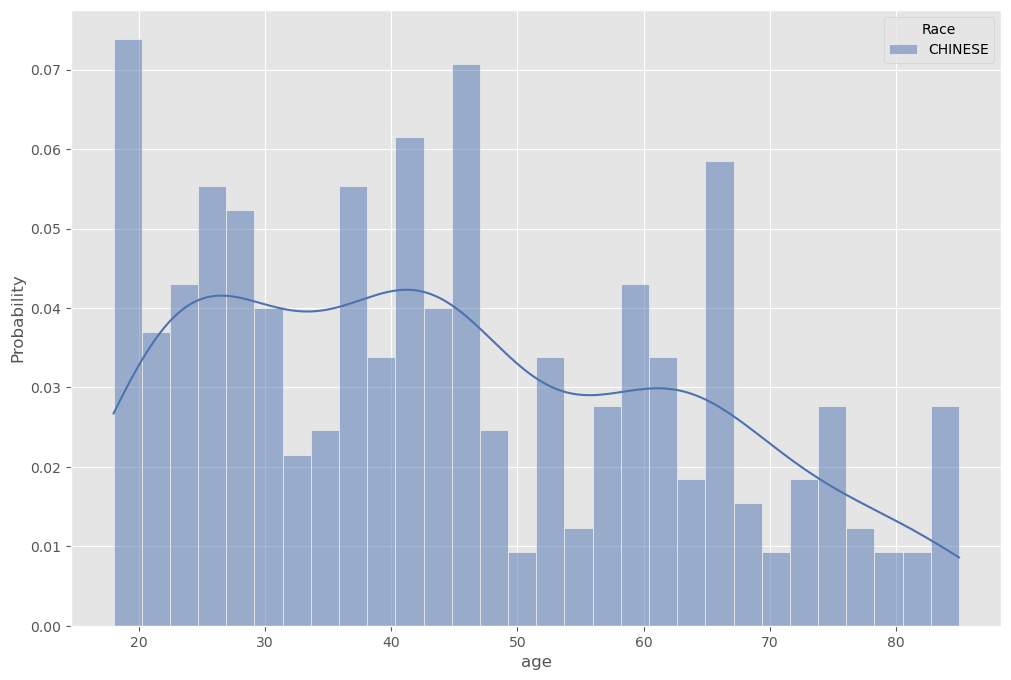

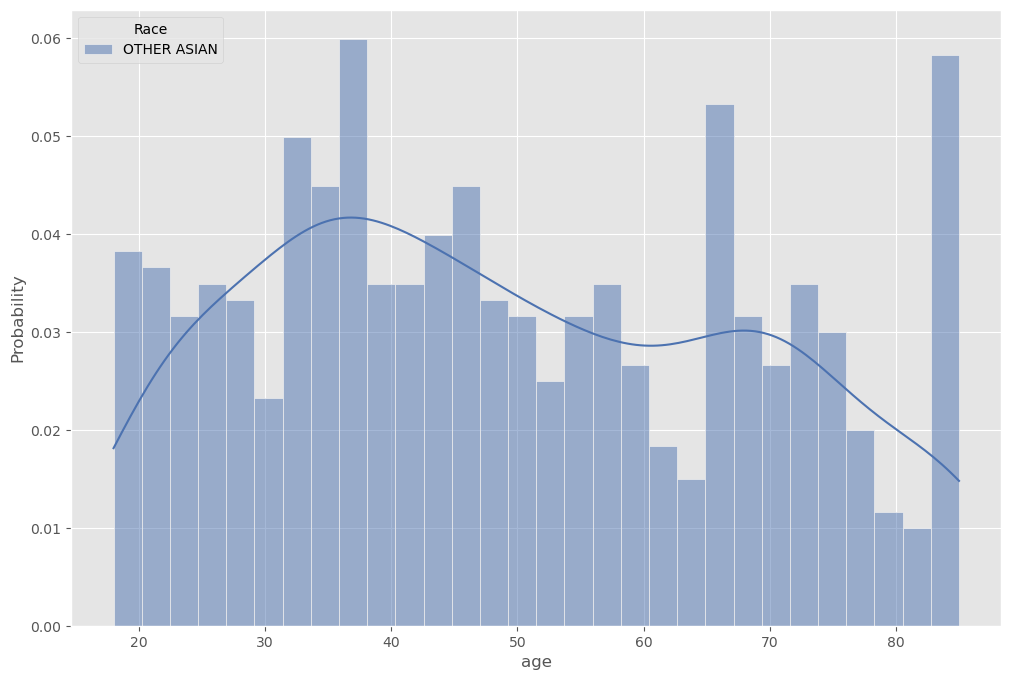

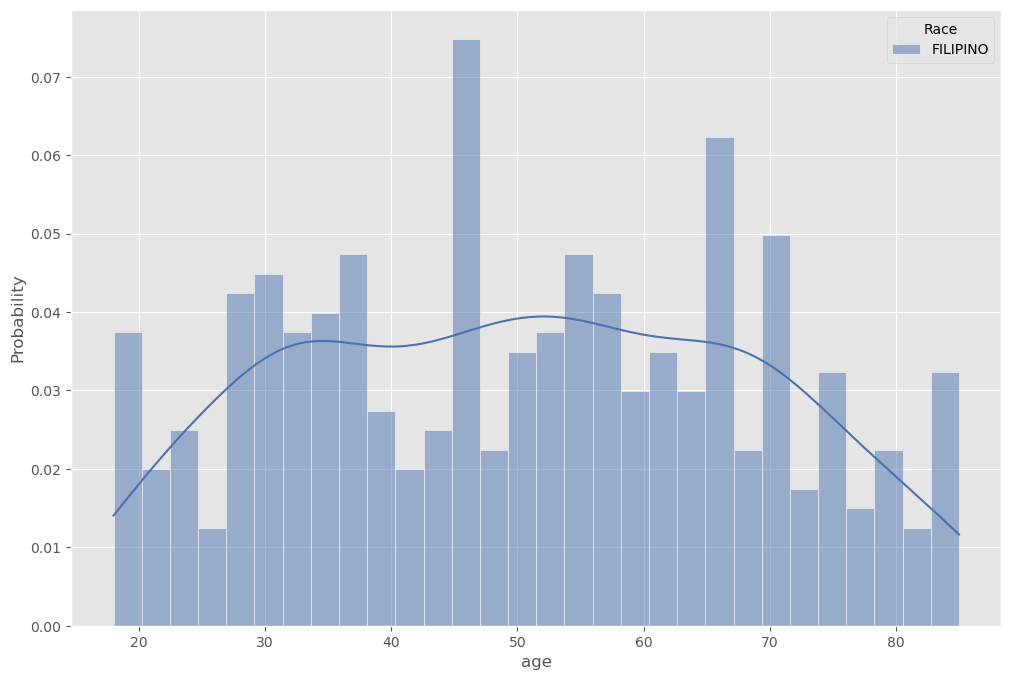

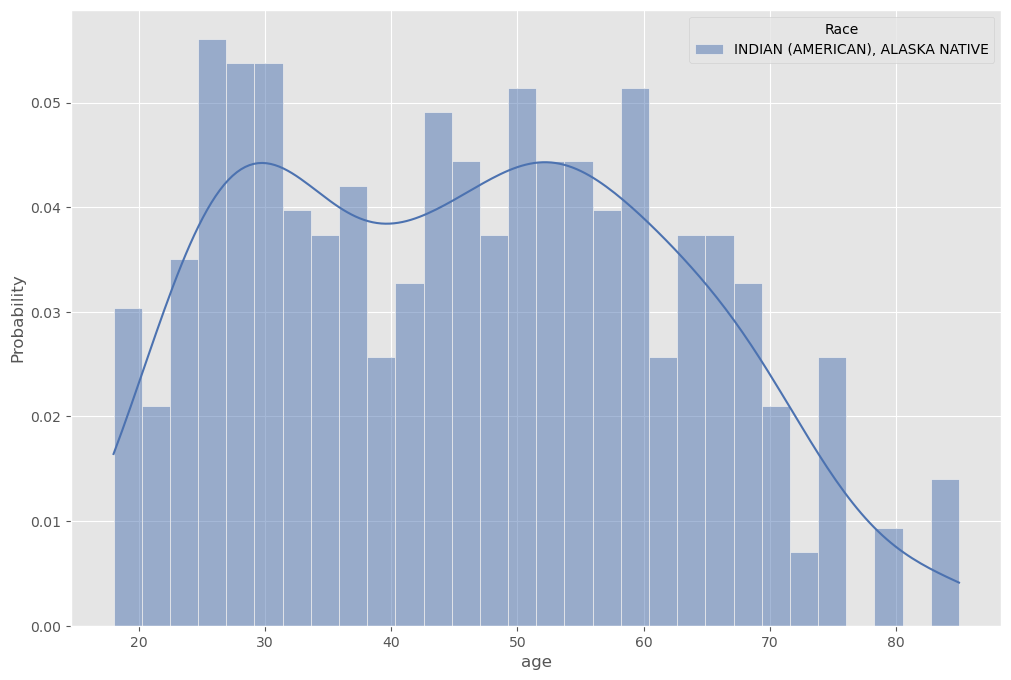

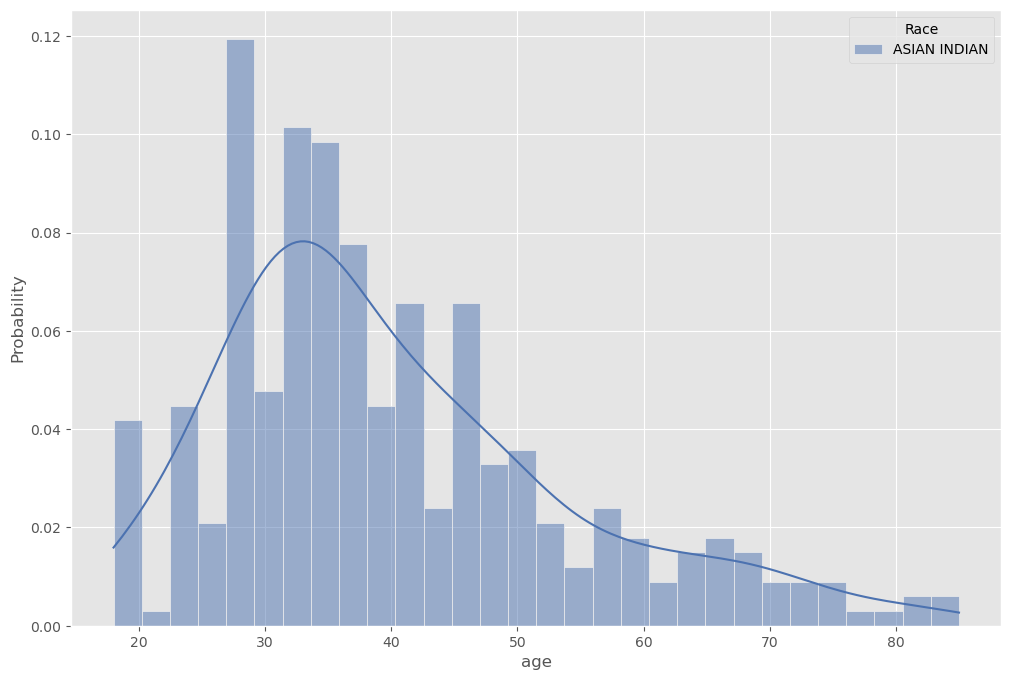

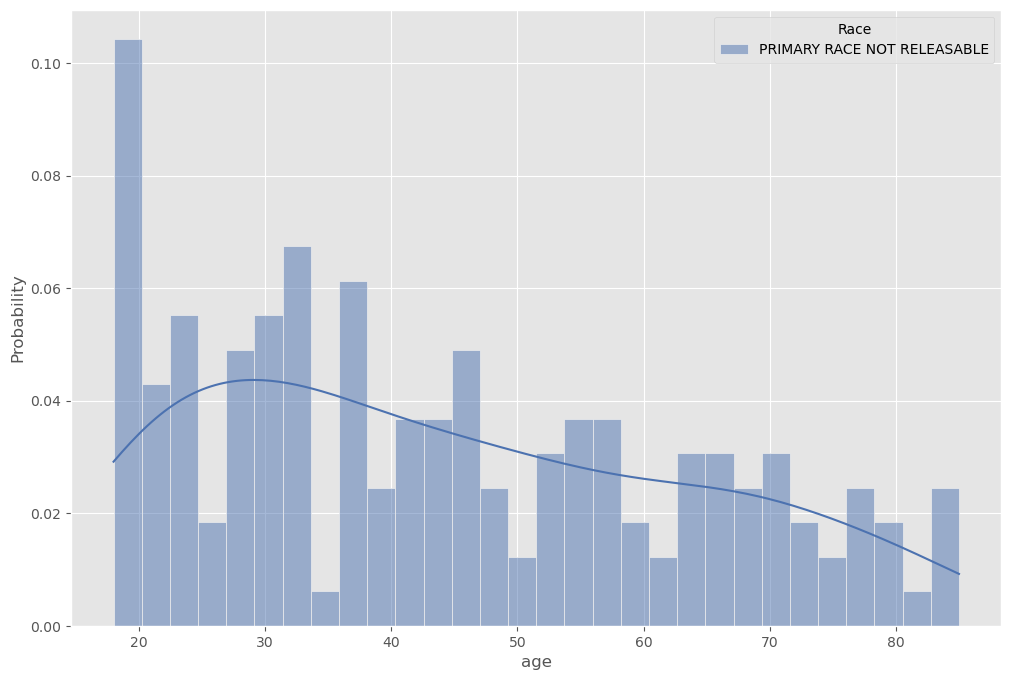

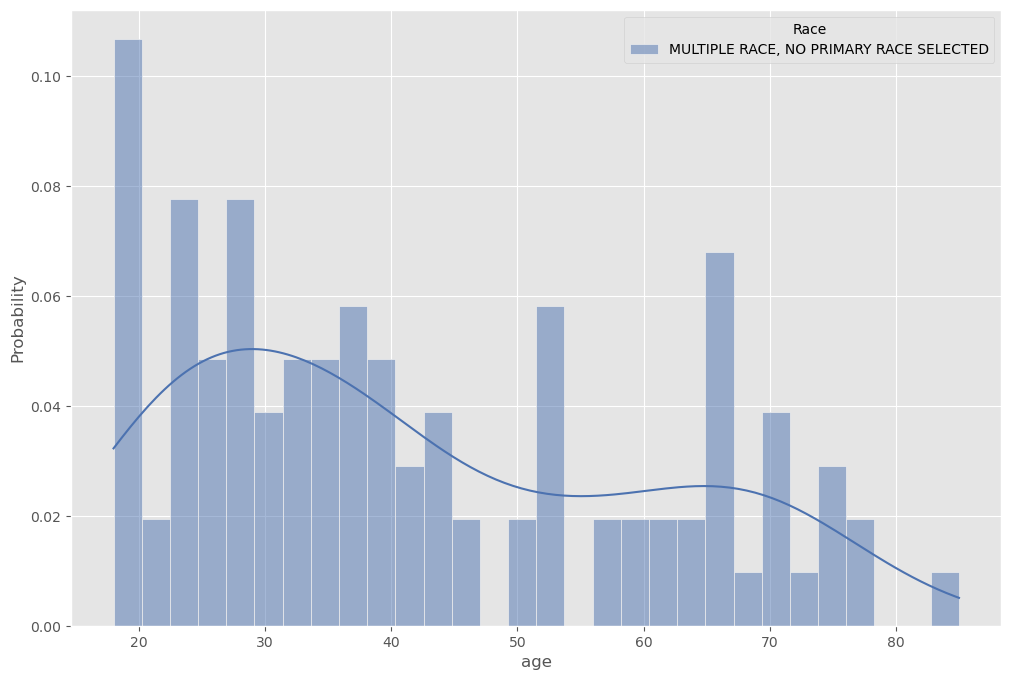

In [111]:
# Create a figure with 3 subplots
# fig, ax = plt.subplots(figsize=(12, 8))  # Unpacking 2D array
# fig.title('New Distributions of Age, Weight, Height and BMI', fontsize=16)

# Histogram for Age

for i in df_clean['non_hispanic_race'].unique():
    fig, ax = plt.subplots(figsize=(12, 8))
    sns.histplot(data=df_clean[df_clean['non_hispanic_race']==i], x='age', label=i.upper(), stat='probability', kde=True, bins=30, ax=ax)
    plt.legend(title='Race')
    plt.show()
# fig.set_title('Distribution of Age')
# fig.set_xlabel('Age (years)')
# fig.set_ylabel('Count')

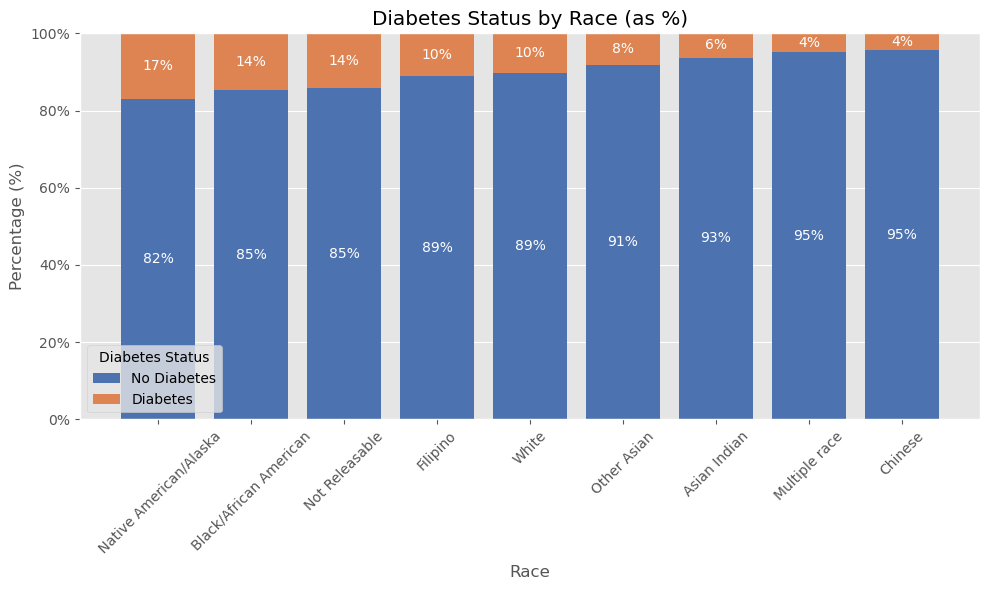

In [243]:
diabetes_counts = df_clean.groupby(['non_hispanic_race', 'diabetes']).agg({'house_family_person_id': 'count'}).reset_index()
diabetes_counts.columns = ['Race', 'Diabetes Status', 'Count']

# Step 2: Calculate totals and percentages
diabetes_counts['Total'] = diabetes_counts.groupby('Race')['Count'].transform('sum')
diabetes_counts['Percentage'] = diabetes_counts['Count'] / diabetes_counts['Total']

stacked_data = diabetes_counts.pivot(index='Race', columns='Diabetes Status', values='Percentage').fillna(0)
stacked_data.index = ['Asian Indian', 'Black/African American', 'Chinese', 'Filipino',
       ' Native American/Alaska',
       'Multiple race', 'Other Asian',
       'Not Releasable', 'White']
# Rename columns for easier access (optional)
stacked_data.columns = ['No Diabetes', 'Diabetes']  # Assuming diabetes status 0 and 1

stacked_data.sort_values('Diabetes', ascending=False, inplace=True)

plt.figure(figsize=(10, 6))

# Create the stacked bar chart with custom colors
plt.bar(stacked_data.index, stacked_data['No Diabetes'], label='No Diabetes')  # Custom color for No Diabetes
plt.bar(stacked_data.index, stacked_data['Diabetes'], bottom=stacked_data['No Diabetes'], label='Diabetes')  # Custom color for Diabetes

# Adding percentages on top of the bars
for i, race in enumerate(stacked_data.index):
    # Calculate the position for the No Diabetes text
    no_diabetes_pct = stacked_data['No Diabetes'].iloc[i]
    diabetes_pct = stacked_data['Diabetes'].iloc[i]

    # Place percentage for No Diabetes
    plt.text(i, no_diabetes_pct / 2, f'{int(no_diabetes_pct * 100)}%', ha='center', va='center', color='white')
    
    # Place percentage for Diabetes
    plt.text(i, no_diabetes_pct + diabetes_pct / 2, f'{int(diabetes_pct * 100)}%', ha='center', va='center', color='white')

# Adding titles and labels
plt.title('Diabetes Status by Race (as %)')
plt.xlabel('Race')
plt.ylabel('Percentage (%)')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.ylim(0, 1)  # Set y-axis limit from 0 to 1 for percentage
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x * 100)}%'))  # Format y-axis as percentage
plt.legend(title='Diabetes Status')

# Show the plot
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()